<a href="https://colab.research.google.com/github/manarifz/Data-Science-Bootcamp/blob/main/Project_MallCustomers_KMeans_JAN2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project goals** : Determining optimise number of clustering from this dataset

**Algorithm used** : KMeans Clustering


In [ ]:
#import necessary libaries for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# **Importing the Dataset**

In [ ]:
#import the dataset
df = pd.read_csv('Mall_Customers.csv')

#read the first 10 rows of the dataset
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# **Data Wrangling**

In [ ]:
#Checking number of rows and columns of the dataset
df.shape

(200, 5)

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
#Checking for any missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#convert categorical value into numerical value
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'].replace(gender_mapping, inplace=True)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# **Exploratory Data Analysis (EDA)**

In [ ]:
#statistical summary of the dataset
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<Axes: >

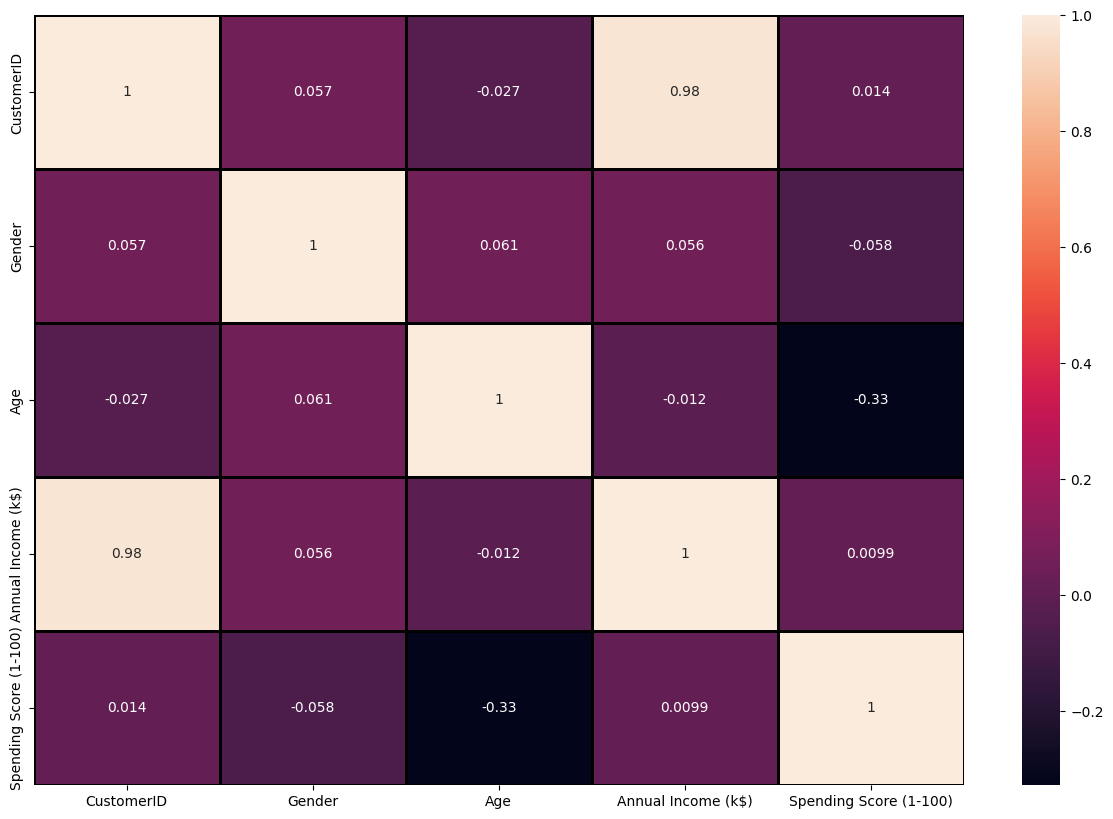

In [ ]:
#heat mapping of correlated features
plt.figure(figsize=(15, 10))

df_corr = df.corr()

sns.heatmap(df_corr, linewidths=1, linecolor='Black', annot=True)

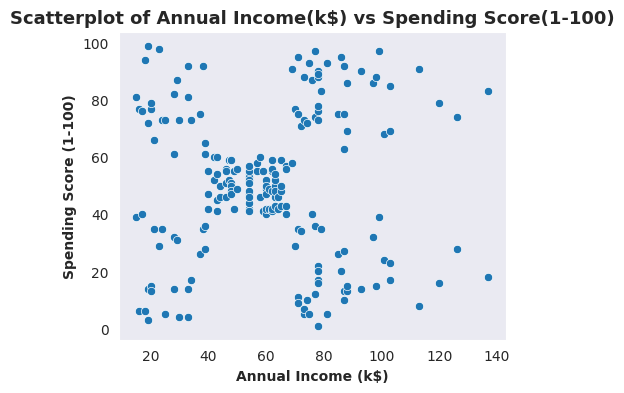

In [ ]:
#Scatter plotting
sns.set_style('dark')
plt.figure(figsize=(5,4))

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Scatterplot of Annual Income(k$) vs Spending Score(1-100)', fontsize=13, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontweight ='bold')
plt.ylabel('Spending Score (1-100)', fontweight ='bold')

plt.show()

# **Data Preprocessing**

In [ ]:
#selecting the annual income (k$) and Spending Score(1-100) feature in the dataframe
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]
#read first five rows
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#feature scaling with Standard Scaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df1)

df_std[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [ ]:
# Feature scaling with Standard Scaler
df_std = pd.DataFrame(data=df_std, columns= df1.columns)
# read first five rows
df_std.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# **K-Means Clustering**

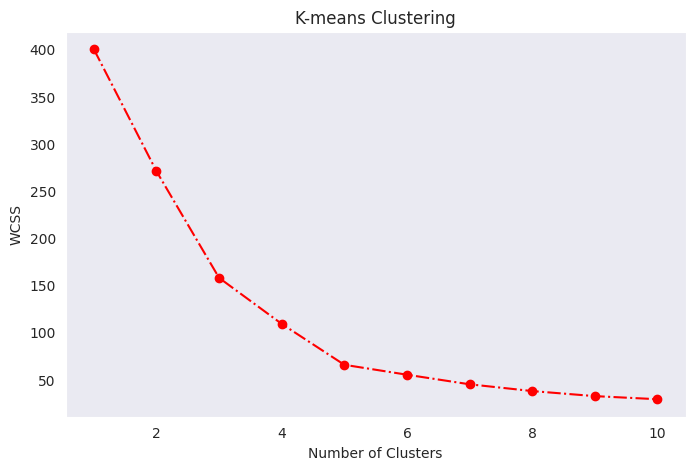

In [ ]:
#Finding the optimal number of k by using the elbow method

# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus.
# And we set a random state for reproducibility.
wcss = [] #Within-Cluster Sum of Square
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

**The optimal value of k = 5 clusters**

In [ ]:
#creating and fitting the k-means clustering model
kmeans = KMeans(n_clusters=5, n_init=5, random_state=42)

kmeans.fit(df_std)

KMeans(n_clusters=5, n_init=5, random_state=42)

In [ ]:
# Adding the clustering result to the dataframe
df_segm_kmeans = df_std.copy()

df_segm_kmeans.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
#adding segmented KMeans to our tables
df_segm_kmeans['Segmented_KMeans'] = kmeans.labels_

df_segm_kmeans.sample(10)

,Annual Income (k$),Spending Score (1-100),Segmented_KMeans
181,1.390894,1.389812,4
155,0.665675,1.506277,4
135,0.474828,1.467455,4
197,2.497807,0.923953,4
176,1.047369,-1.366519,1
171,1.009200,0.962775,4
144,0.627505,-1.482984,1
69,-0.479408,-0.124229,0
126,0.398489,-0.590088,0
157,0.665675,1.079239,4


In [ ]:
# adding the segmented labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segmented_KMeans'].map({0:'G1',
                                                                  1:'G2',
                                                                  2:'G3',
                                                                  3:'G4',
                                                                  4:'G5'})


df_segm_kmeans.sample(10)

,Annual Income (k$),Spending Score (1-100),Segmented_KMeans,Labels
89,-0.097714,-0.163051,0,G1
53,-0.670255,0.380451,0,G1
74,-0.250391,-0.124229,0,G1
168,1.009200,-0.900660,1,G2
107,0.093133,-0.163051,0,G1
70,-0.441239,0.186343,0,G1
1,-1.738999,1.195704,3,G4
33,-1.051949,1.622741,3,G4
68,-0.479408,0.341630,0,G1
137,0.474828,0.885132,4,G5


In [ ]:
# Grouping the Segmented Kmeans
df_segm_kmeans_grouped = df_segm_kmeans.groupby(['Segmented_KMeans']).mean()

df_segm_kmeans_grouped

,Annual Income (k$),Spending Score (1-100)
Segmented_KMeans,,
0,-0.200913,-0.026456
1,1.055003,-1.284439
2,-1.307519,-1.136965
3,-1.329545,1.132178
4,0.991583,1.239503


In [ ]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segmented_KMeans'].map({0:'G1',
                                                                  1:'G2',
                                                                  2:'G3',
                                                                  3:'G4',
                                                                  4:'G5'})


df_segm_kmeans.head()

,Annual Income (k$),Spending Score (1-100),Segmented_KMeans,Labels
0,-1.738999,-0.434801,2,G3
1,-1.738999,1.195704,3,G4
2,-1.700830,-1.715913,2,G3
3,-1.700830,1.040418,3,G4
4,-1.662660,-0.395980,2,G3


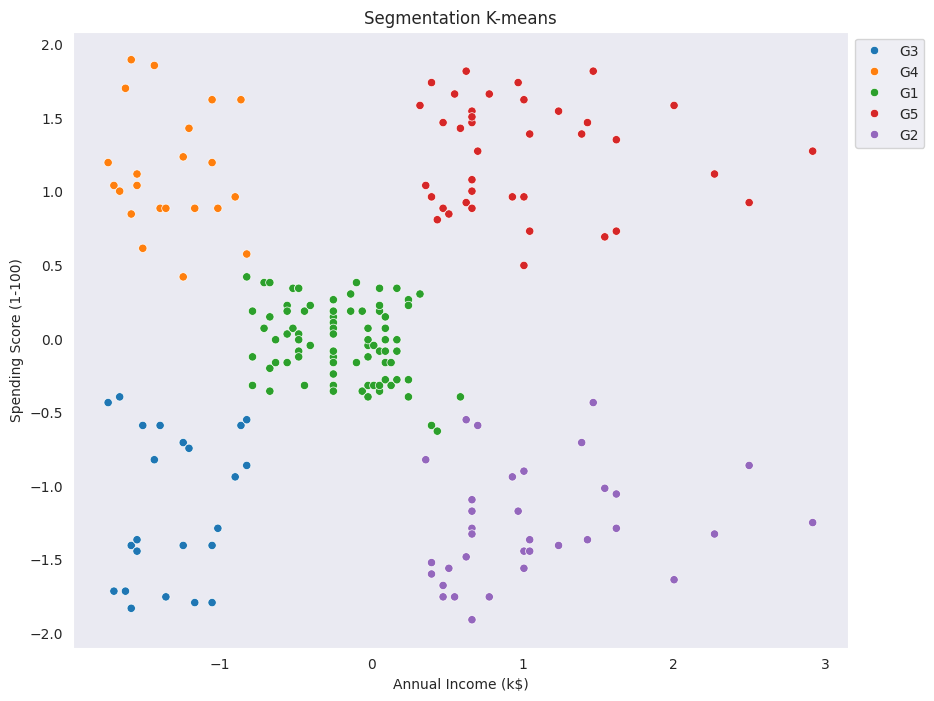

In [ ]:
# We plot the results from the K-means algorithm.
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Annual Income (k$)']
y_axis = df_segm_kmeans['Spending Score (1-100)']
plt.figure(figsize = (10, 8))
#sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
sns.scatterplot(data=df_segm_kmeans, x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'])
plt.title('Segmentation K-means')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# **Conclusion**

It was concluded that in mall customer dataset, the highest correlation features is Annual Income (k$) and Spending Score(1-100). By using these selected features, we were able to determine the optimised number of clustering (k-means) which consist of 5 clustering using elbow method. Further analysis was done to visualise the optimised number of clustering of the dataset through Segmentation of Kmeans.